In [1]:
# -*- coding: UTF-8 -*-

from matplotlib.font_manager import FontProperties
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
import operator

# 定义函数

In [2]:
"""
函数说明:kNN算法,分类器

Parameters:
    inX - 用于分类的数据(测试集)
    dataSet - 用于训练的数据(训练集)
    labes - 分类标签
    k - kNN算法参数,选择距离最小的k个点
Returns:
    sortedClassCount[0][0] - 分类结果

Modify:
    2017-03-24
"""
def _classify0(inX, dataSet, labels, k):
    #numpy函数shape[0]返回dataSet的行数
    dataSetSize = dataSet.shape[0]    
    '''
    [x,y]           [x0,y0]
    [x,y]     -     [x1,y1] 
    ...             ...
    [x,y]           [xn,yn]    
    ''' 
    #在列向量方向上重复inX共1次(横向),行向量方向上重复inX共dataSetSize次(纵向)
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    #二维特征相减后平方
    sqDiffMat = diffMat**2
    #sum()所有元素相加,sum(0)列相加,sum(1)行相加
    sqDistances = sqDiffMat.sum(axis=1)
    #开方,计算出距离
    distances = sqDistances**0.5
    #返回distances中元素从小到大排序后的索引值
    sortedDistIndices = distances.argsort()
    #定一个记录类别次数的字典
    classCount = {}
    for i in range(k):
        #取出前k个元素的类别
        voteIlabel = labels[sortedDistIndices[i]]
        #dict.get(key,default=None),字典的get()方法,返回指定键的值,如果值不在字典中返回默认值。
        #计算类别次数
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    #python3中用items()替换python2中的iteritems()
    #key=operator.itemgetter(1)根据字典的值进行排序
    #key=operator.itemgetter(0)根据字典的键进行排序
    #reverse降序排序字典
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    print(sortedClassCount)
    #返回次数最多的类别,即所要分类的类别
    return sortedClassCount[0][0]

In [3]:
"""
函数说明:打开并解析文件，对数据进行分类：1代表不喜欢,2代表魅力一般,3代表极具魅力

Parameters:
    filename - 文件名
Returns:
    returnMat - 特征矩阵
    classLabelVector - 分类Label向量

Modify:
    2017-03-24
"""
def _file2matrix(filename):
    #打开文件,此次应指定编码，

    fr = open(filename,'r',encoding = 'utf-8')
    #读取文件所有内容
    arrayOLines = fr.readlines()
    #针对有BOM的UTF-8文本，应该去掉BOM，否则后面会引发错误。
    arrayOLines[0]=arrayOLines[0].lstrip('\ufeff')
    #得到文件行数
    numberOfLines = len(arrayOLines)
    #返回的NumPy矩阵,解析完成的数据:numberOfLines行,3列
    returnMat = np.zeros((numberOfLines,3))
    #返回的分类标签向量
    classLabelVector = []
    #行的索引值
    index = 0

    for line in arrayOLines:
        #s.strip(rm)，当rm空时,默认删除空白符(包括'\n','\r','\t',' ')
        line = line.strip()
        #使用s.split(str="",num=string,cout(str))将字符串根据'\t'分隔符进行切片。
        listFromLine = line.split('\t')
        #将数据前三列提取出来,存放到returnMat的NumPy矩阵中,也就是特征矩阵
        returnMat[index,:] = listFromLine[0:3]
        #根据文本中标记的喜欢的程度进行分类,1代表不喜欢,2代表魅力一般,3代表极具魅力   
        # 对于datingTestSet2.txt  最后的标签是已经经过处理的 标签已经改为了1, 2, 3
        if listFromLine[-1] == 'didntLike':
            classLabelVector.append(1)
        elif listFromLine[-1] == 'smallDoses':
            classLabelVector.append(2)
        elif listFromLine[-1] == 'largeDoses':
            classLabelVector.append(3)
        index += 1
    return returnMat, classLabelVector

In [4]:
"""
函数说明:可视化数据

Parameters:
    datingDataMat - 特征矩阵
    datingLabels - 分类Label
Returns:
    无
Modify:
    2017-03-24
"""
def showdatas(datingDataMat, datingLabels):
    #设置汉字格式
    font = FontProperties(fname=r"c:\windows\fonts\simsunb.ttf", size=14)  ##需要查看自己的电脑是否会包含该字体
    #将fig画布分隔成1行1列,不共享x轴和y轴,fig画布的大小为(13,8)
    #当nrow=2,nclos=2时,代表fig画布被分为四个区域,axs[0][0]表示第一行第一个区域
    fig, axs = plt.subplots(nrows=2, ncols=2,sharex=False, sharey=False, figsize=(13,8))

    numberOfLabels = len(datingLabels)
    LabelsColors = []
    for i in datingLabels:
        if i == 1:
            LabelsColors.append('black')
        if i == 2:
            LabelsColors.append('orange')
        if i == 3:
            LabelsColors.append('red')
    #画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第二列(玩游戏)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][0].scatter(x=datingDataMat[:,0], y=datingDataMat[:,1], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs0_title_text = axs[0][0].set_title('每年获得的飞行常客里程数与玩视频游戏所消耗时间占比',FontProperties=font)
    axs0_xlabel_text = axs[0][0].set_xlabel('每年获得的飞行常客里程数',FontProperties=font)
    axs0_ylabel_text = axs[0][0].set_ylabel('玩视频游戏所消耗时间占比',FontProperties=font)
    plt.setp(axs0_title_text, size=9, weight='bold', color='red')  
    plt.setp(axs0_xlabel_text, size=7, weight='bold', color='black')  
    plt.setp(axs0_ylabel_text, size=7, weight='bold', color='black') 

    #画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][1].scatter(x=datingDataMat[:,0], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs1_title_text = axs[0][1].set_title('每年获得的飞行常客里程数与每周消费的冰激淋公升数',FontProperties=font)
    axs1_xlabel_text = axs[0][1].set_xlabel('每年获得的飞行常客里程数',FontProperties=font)
    axs1_ylabel_text = axs[0][1].set_ylabel('每周消费的冰激淋公升数',FontProperties=font)
    plt.setp(axs1_title_text, size=9, weight='bold', color='red')  
    plt.setp(axs1_xlabel_text, size=7, weight='bold', color='black')  
    plt.setp(axs1_ylabel_text, size=7, weight='bold', color='black') 

    #画出散点图,以datingDataMat矩阵的第二(玩游戏)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[1][0].scatter(x=datingDataMat[:,1], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs2_title_text = axs[1][0].set_title(u'玩视频游戏所消耗时间占比与每周消费的冰激淋公升数',FontProperties=font)
    axs2_xlabel_text = axs[1][0].set_xlabel(u'玩视频游戏所消耗时间占比',FontProperties=font)
    axs2_ylabel_text = axs[1][0].set_ylabel(u'每周消费的冰激淋公升数',FontProperties=font)
    plt.setp(axs2_title_text, size=9, weight='bold', color='red')  
    plt.setp(axs2_xlabel_text, size=7, weight='bold', color='black')  
    plt.setp(axs2_ylabel_text, size=7, weight='bold', color='black') 
    #设置图例
    didntLike = mlines.Line2D([], [], color='black', marker='.',
                      markersize=6, label='didntLike')
    smallDoses = mlines.Line2D([], [], color='orange', marker='.',
                      markersize=6, label='smallDoses')
    largeDoses = mlines.Line2D([], [], color='red', marker='.',
                      markersize=6, label='largeDoses')
    #添加图例
    axs[0][0].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[0][1].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[1][0].legend(handles=[didntLike,smallDoses,largeDoses])
    #显示图片
    plt.show()

In [5]:
"""
函数说明:对数据进行归一化

Parameters:
    dataSet - 特征矩阵
Returns:
    normDataSet - 归一化后的特征矩阵
    ranges - 数据范围
    minVals - 数据最小值

Modify:
    2017-03-24
"""
def autoNorm(dataSet):
    #  Xnorm  =  (X-min) / (max-min)
    
    #获得数据的最小值
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    #最大值和最小值的范围
    ranges = maxVals - minVals
    #shape(dataSet)返回dataSet的矩阵行列数
    normDataSet = np.zeros(np.shape(dataSet))
    #返回dataSet的行数
    m = dataSet.shape[0]
    #原始值减去最小值
    normDataSet = dataSet - np.tile(minVals, (m, 1))
    #除以最大和最小值的差,得到归一化数据
    normDataSet = normDataSet / np.tile(ranges, (m, 1))
    #返回归一化数据结果,数据范围,最小值
    return normDataSet, ranges, minVals


In [6]:
"""
函数说明:分类器测试函数
取百分之十的数据作为测试数据，检测分类器的正确性

Parameters:
    无
Returns:
    无

Modify:
    2017-03-24
"""
def datingClassTest():
    #打开的文件名
    filename = "datingTestSet.txt"
    #将返回的特征矩阵和分类向量分别存储到datingDataMat和datingLabels中
    datingDataMat, datingLabels = _file2matrix(filename)
    #取所有数据的百分之十
    hoRatio = 0.10
    #数据归一化,返回归一化后的矩阵,数据范围,数据最小值
    normMat, ranges, minVals = autoNorm(datingDataMat)
    #获得normMat的行数
    m = normMat.shape[0]
    #百分之十的测试数据的个数
    numTestVecs = int(m * hoRatio)
    #分类错误计数
    errorCount = 0.0

    for i in range(numTestVecs):
        #前numTestVecs个数据作为测试集,后m-numTestVecs个数据作为训练集
        classifierResult = _classify0(normMat[i,:], normMat[numTestVecs:m,:], 
            datingLabels[numTestVecs:m], 4)
        print("分类结果:%s\t真实类别:%d" % (classifierResult, datingLabels[i]))
        if classifierResult != datingLabels[i]:
            errorCount += 1.0
    print("错误率:%f%%" %(errorCount/float(numTestVecs)*100))

In [7]:
"""
函数说明:通过输入一个人的三维特征,进行分类输出

Parameters:
    无
Returns:
    无

Modify:
    2017-03-24
"""
def classifyPerson():
    #输出结果
    resultList = ['讨厌','有些喜欢','非常喜欢']
    #三维特征用户输入
    precentTats = float(input("玩视频游戏所耗时间百分比:"))
    ffMiles = float(input("每年获得的飞行常客里程数:"))
    iceCream = float(input("每周消费的冰激淋公升数:"))
    #打开的文件名
    filename = "datingTestSet.txt"
    #打开并处理数据
    datingDataMat, datingLabels = _file2matrix(filename)
    #训练集归一化
    normMat, ranges, minVals = autoNorm(datingDataMat)
    #生成NumPy数组,测试集
    inArr = np.array([ffMiles, precentTats, iceCream])
    #测试集归一化
    norminArr = (inArr - minVals) / ranges
    #返回分类结果
    classifierResult = _classify0(norminArr, normMat, datingLabels, 3)
    #打印结果
    print("你可能%s这个人" % (resultList[classifierResult-1]))

# 验证结果

## 取百分之十的数据作为测试数据，检测分类器的正确性

In [11]:
datingClassTest()

[(3, 4)]
分类结果:3	真实类别:3
[(2, 2), (3, 2)]
分类结果:2	真实类别:2
[(1, 4)]
分类结果:1	真实类别:1
[(1, 4)]
分类结果:1	真实类别:1
[(1, 4)]
分类结果:1	真实类别:1
[(1, 4)]
分类结果:1	真实类别:1
[(3, 3), (1, 1)]
分类结果:3	真实类别:3
[(3, 4)]
分类结果:3	真实类别:3
[(1, 4)]
分类结果:1	真实类别:1
[(3, 4)]
分类结果:3	真实类别:3
[(1, 4)]
分类结果:1	真实类别:1
[(1, 4)]
分类结果:1	真实类别:1
[(2, 4)]
分类结果:2	真实类别:2
[(1, 4)]
分类结果:1	真实类别:1
[(1, 4)]
分类结果:1	真实类别:1
[(1, 4)]
分类结果:1	真实类别:1
[(1, 4)]
分类结果:1	真实类别:1
[(1, 4)]
分类结果:1	真实类别:1
[(2, 4)]
分类结果:2	真实类别:2
[(3, 4)]
分类结果:3	真实类别:3
[(2, 4)]
分类结果:2	真实类别:2
[(1, 4)]
分类结果:1	真实类别:1
[(2, 2), (3, 1), (1, 1)]
分类结果:2	真实类别:2
[(3, 3), (1, 1)]
分类结果:3	真实类别:3
[(2, 4)]
分类结果:2	真实类别:2
[(3, 4)]
分类结果:3	真实类别:3
[(2, 4)]
分类结果:2	真实类别:2
[(3, 4)]
分类结果:3	真实类别:3
[(2, 4)]
分类结果:2	真实类别:2
[(1, 4)]
分类结果:1	真实类别:1
[(3, 4)]
分类结果:3	真实类别:3
[(1, 4)]
分类结果:1	真实类别:1
[(3, 2), (2, 2)]
分类结果:3	真实类别:3
[(1, 4)]
分类结果:1	真实类别:1
[(2, 3), (3, 1)]
分类结果:2	真实类别:2
[(1, 4)]
分类结果:1	真实类别:1
[(1, 4)]
分类结果:1	真实类别:1
[(2, 4)]
分类结果:2	真实类别:2
[(3, 4)]
分类结果:3	真实类别:3
[(3, 4)]
分类结果:3	真实类别:3
[(1, 4)]
分类结果:1	真实类别:1
[

## 通过输入一个人的三维特征,进行分类输出

In [14]:
classifyPerson()

玩视频游戏所耗时间百分比:20
每年获得的飞行常客里程数:1
每周消费的冰激淋公升数:1
[(3, 3)]
你可能非常喜欢这个人


## 数据展示

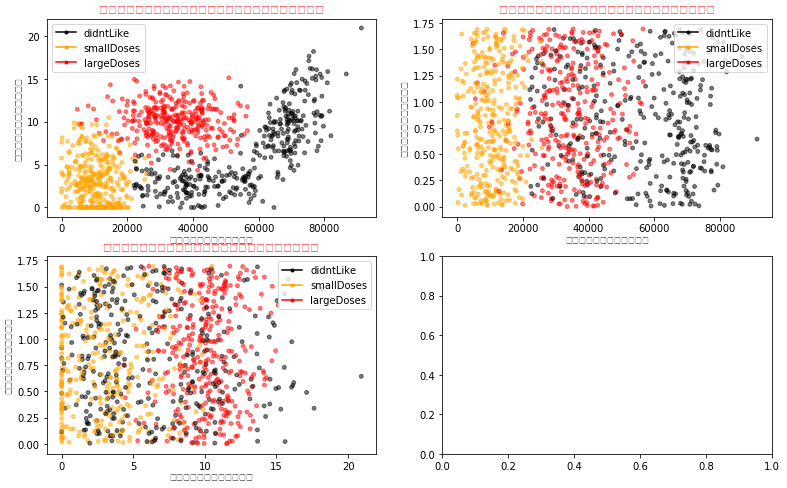

In [13]:
#打开的文件名
filename = "datingTestSet.txt"
#将返回的特征矩阵和分类向量分别存储到datingDataMat和datingLabels中
datingDataMat, datingLabels = _file2matrix(filename)
showdatas(datingDataMat, datingLabels)